<a href="https://colab.research.google.com/github/rajagopalmotivate/hack2023/blob/main/cebral_palsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELC hack 2023: Access to beauty for person with celebray palsy

## To run this code, simply Open this in Google colab, and Click "Run all" from the Runtime menu

In [1]:
#@title
#from google.colab import files

#uploaded = files.upload()

In [2]:
#@title
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#@title
!wget https://raw.githubusercontent.com/rajagopalmotivate/hack2023/main/samples/cerebralpalsyhand.png
uploaded = ['cerebralpalsyhand.png']

--2023-04-01 03:01:05--  https://raw.githubusercontent.com/rajagopalmotivate/hack2023/main/samples/cerebralpalsyhand.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159595 (156K) [image/png]
Saving to: ‘cerebralpalsyhand.png.5’

cerebralpalsyhand.p 100%[===================>] 155.85K  --.-KB/s    in 0.008s  

2023-04-01 03:01:05 (18.9 MB/s) - ‘cerebralpalsyhand.png.5’ saved [159595/159595]



In [4]:
#@title
uploaded

['cerebralpalsyhand.png']

##uploading sample photo

cerebralpalsyhand.png


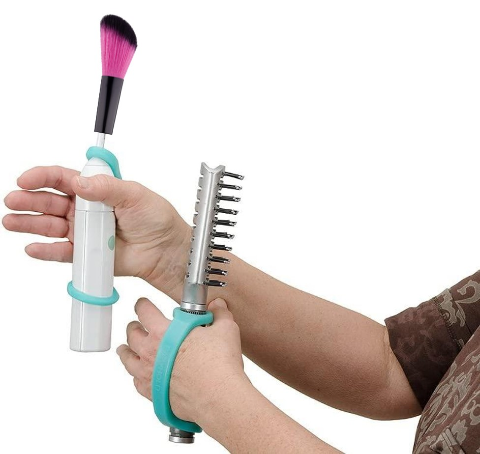

In [5]:
#@title
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

# Detecting 

In [6]:
#@title
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
##help(mp_hands.Hands)

Handedness of cerebralpalsyhand.png:
[classification {
  index: 1
  score: 0.9504479169845581
  label: "Right"
}
]
Hand landmarks of cerebralpalsyhand.png:
Index finger tip coordinate: ( 454.5623588562012, 181.9383402466774)


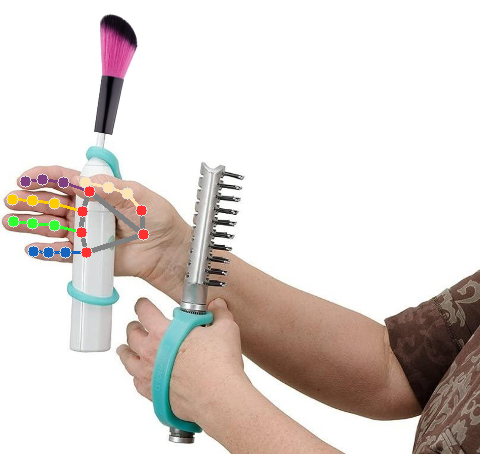

In [7]:
#@title
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.01) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))

Hand world landmarks of cerebralpalsyhand.png:


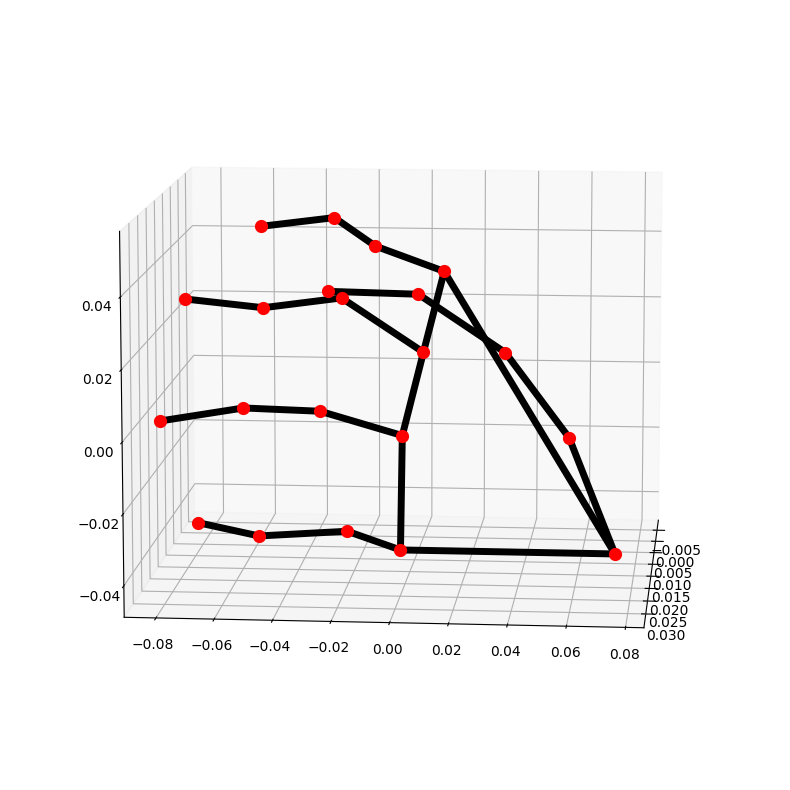

In [8]:
#@title
# Run MediaPipe Hands and plot 3d hands world landmarks.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Hands.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Draw hand world landmarks.
    print(f'Hand world landmarks of {name}:')
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)